<a href="https://colab.research.google.com/github/Azharuddin91284/InnomaticsHackathon_2024/blob/main/InnomaticsHackthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ratings_df = pd.read_csv('ratings.csv')




In [ ]:
unique_user_ids = ratings_df['userId'].nunique()

print(f"The number of unique userId values in ratings.csv is: {unique_user_ids}")

The number of unique userId values in ratings.csv is: 610


In [ ]:
data_shape =ratings_df.shape
print(f"The shape of the dataset is: {data_shape}")

The shape of the dataset is: (100836, 4)


In [ ]:

ratings_df = pd.read_csv('ratings.csv')

ratings_count = ratings_df['movieId'].value_counts()

most_rated_movie_id = ratings_count.idxmax()

movies_df = pd.read_csv('movies.csv')

# Get the title of the most-rated movie
most_rated_movie_title = movies_df.loc[movies_df['movieId'] == most_rated_movie_id, 'title'].values[0]

print(f"The movie with the maximum number of user ratings is: {most_rated_movie_title}")


The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [ ]:
movies_df = pd.read_csv('movies.csv')

matrix_movie_id = movies_df.loc[movies_df['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

tags_df = pd.read_csv('tags.csv')

matrix_tags = tags_df.loc[tags_df['movieId'] == matrix_movie_id, 'tag']

# Display the unique tags for "Matrix, The (1999)"
unique_matrix_tags = matrix_tags.unique()
print("Tags submitted by users for 'Matrix, The (1999)':")
print(unique_matrix_tags)

Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [ ]:
movies_df = pd.read_csv('movies.csv')

ratings_df = pd.read_csv('ratings.csv')

terminator_movie_id = movies_df.loc[movies_df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

terminator_ratings = ratings_df.loc[ratings_df['movieId'] == terminator_movie_id, 'rating']

# Calculate the average user rating
average_rating_terminator = terminator_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating_terminator:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


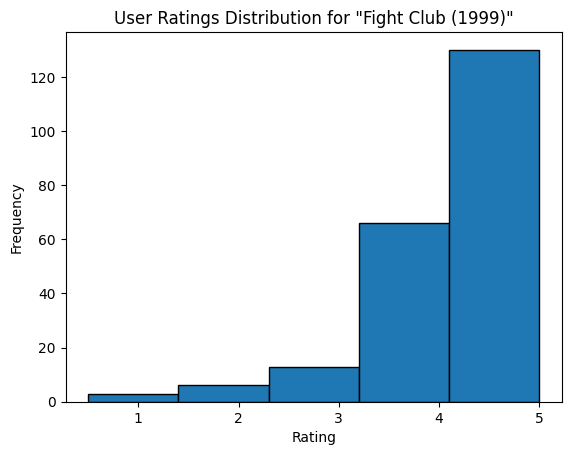

In [ ]:

import matplotlib.pyplot as plt

movies_df = pd.read_csv('movies.csv')

ratings_df = pd.read_csv('ratings.csv')
fight_club_movie_id = movies_df.loc[movies_df['title'] == 'Fight Club (1999)', 'movieId'].values[0]

# Filter ratings for the specified movieId
fight_club_ratings = ratings_df.loc[ratings_df['movieId'] == fight_club_movie_id, 'rating']

# Plot a histogram of user ratings
plt.hist(fight_club_ratings, bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ratings_df = pd.read_csv('ratings.csv')

ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean'])
print(ratings_grouped)

movies_df = pd.read_csv('movies.csv')

merged_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Display the resulting DataFrame
print(merged_df)

filtered_movies = merged_df[merged_df['count'] > 50]

# Display the resulting DataFrame
print(filtered_movies)

         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429
...        ...       ...
193581       1  4.000000
193583       1  3.500000
193585       1  3.500000
193587       1  3.500000
193609       1  4.000000

[9724 rows x 2 columns]
      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple 

In [ ]:
most_popular_movie = merged_df.sort_values(by='mean', ascending=False).iloc[0]

print(f"The most popular movie based on average user ratings is:")
print(most_popular_movie[['title', 'mean']])

The most popular movie based on average user ratings is:
title    Paper Birds (Pájaros de papel) (2010)
mean                                       5.0
Name: 7638, dtype: object


In [ ]:
most_popular_movie = filtered_movies.sort_values(by='mean', ascending=False).iloc[0]

print(f"The most popular movie based on average user ratings is:")
print(most_popular_movie[['title', 'mean']])

The most popular movie based on average user ratings is:
title    Shawshank Redemption, The (1994)
mean                             4.429022
Name: 277, dtype: object


In [ ]:
top5_popular_movies = filtered_movies.sort_values(by='count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top5_popular_movies[['title', 'count']])

Top 5 popular movies based on number of user ratings:
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [ ]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

third_most_popular_sci_fi_movie = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is:")
print(third_most_popular_sci_fi_movie[['title', 'count']])

The third most popular Sci-Fi movie based on the number of user ratings is:
title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [ ]:

import pandas as pd

# Load links.csv
links_df = pd.read_csv('links.csv')

In [ ]:
# Assuming filtered_movies is the dataframe obtained from previous operations
merged_df = pd.merge(filtered_movies, links_df, on='movieId', how='inner')


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
links = pd.read_csv('links.csv')

In [ ]:
rating = pd.read_csv('ratings.csv')

In [ ]:
movies = pd.read_csv('movies.csv')

In [ ]:
tags = pd.read_csv('tags.csv')

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# Merge file1 with ratings.csv based on a common column 'column_name1'
merged_ratings = pd.merge(rating,tags, on='movieId', how='inner')


In [ ]:
merge_movies = pd.merge(merged_ratings, movies, on='movieId', how='inner')

In [ ]:
merge_links = pd.merge(merge_movies, links, on='movieId', how='inner')

In [ ]:
merge_links.head()

,userId_x,movieId,rating,timestamp_x,userId_y,tag,timestamp_y,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,336,pixar,1139045764,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,1,4.0,964982703,474,pixar,1137206825,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,1,1,4.0,964982703,567,fun,1525286013,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,5,1,4.0,847434962,336,pixar,1139045764,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,5,1,4.0,847434962,474,pixar,1137206825,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [ ]:
merge_links.shape

(233213, 11)

In [ ]:
highest_rated_movie_info

userId_x                           414
movieId                           3951
rating                             5.0
timestamp_x                  997453431
userId_y                           474
tag                   In Netflix queue
timestamp_y                 1137179732
title          Two Family House (2000)
genres                           Drama
imdbId                          202641
tmdbId                         63956.0
Name: 232796, dtype: object

In [ ]:

sci_fi_movies = merge_links[merge_links['genres'].str.contains('Sci-Fi')]

# Find the movie with the highest IMDB rating among Sci-Fi movies
highest_rated_scifi_movie = sci_fi_movies.loc[sci_fi_movies['genres'].str.contains('Sci-Fi')].nlargest(1, 'imdbId')

# Get the movieId of the highest-rated Sci-Fi movie
highest_rated_scifi_movie_id = highest_rated_scifi_movie['movieId'].values[0]

In [ ]:
highest_rated_scifi_movie_id

187593